## Week 8 Python Importing Library 

In [1]:
%load_ext autoreload
%autoreload 2
import os
import sys
sys.path.append(os.path.abspath('../Scripts'))
from data_loading import CSVReader
from eda import DataPreprocessor
from plot import Visualization
# from preprocessing import FeatureEngineering
# from credit_scoring import CreditScoring
from train_model import ModelTrainer
from build_models import ModelTrainer1
from explainability import ModelExplainability

In [2]:
# pip install lime

In [ ]:
# pip install mlflow
# pip install imbalanced-learn
# pip install shap 
# pip install lime

In [2]:
# Create an instance of CSVReader
read_csv_data = CSVReader('../../10_X_data/creditcard.csv')
read_csv_data1 = CSVReader('../../10_X_data/Fraud_Data.csv')
read_csv_data2 = CSVReader('../../10_X_data/IpAddress_to_Country.csv')

In [3]:
# Load the CSV file
df = read_csv_data.read_csv()
df1 = read_csv_data1.read_csv()
df2 = read_csv_data2.read_csv()

CSV file successfully loaded.
CSV file successfully loaded.
CSV file successfully loaded.


## Exploratory Data Analysis (EDA)
### Univariate analysis
### Bivariate analysis

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [100]:
# Basic info
print(df.info())  # Check data types and missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [104]:
df.describe().T  # Summary statistics

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [103]:
print(df.duplicated().sum())  # Count duplicates

1081


In [6]:
df1.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


In [7]:
df2.head()

,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216.0,16777471,Australia
1,16777472.0,16777727,China
2,16777728.0,16778239,China
3,16778240.0,16779263,Australia
4,16779264.0,16781311,China


### Check if there is missed values

In [27]:
df[df.isna().any(axis=1)]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class


In [28]:
df1[df1.isna().any(axis=1)]

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class


In [29]:
df2[df2.isna().any(axis=1)]

,lower_bound_ip_address,upper_bound_ip_address,country


In [30]:
df.shape, df1.shape,df2.shape

((284807, 31), (151112, 11), (138846, 3))

In [40]:
df1.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


In [4]:
preprocessor = DataPreprocessor(df, df1, df2)

#### Actually the data doesn't have missed values but if it happen it can be handle in the below code

In [5]:
df_cleaned, df1_cleaned, df2_cleaned = preprocessor.handle_missing_values()

Missing values handled.


In [7]:
df_cleaned.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

### Check if there is duplicated values

In [30]:
df[df.duplicated()]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
33,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,...,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
35,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
113,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
114,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
115,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282987,171288.0,1.912550,-0.455240,-1.750654,0.454324,2.089130,4.160019,-0.881302,1.081750,1.022928,...,-0.524067,-1.337510,0.473943,0.616683,-0.283548,-1.084843,0.073133,-0.036020,11.99,0
283483,171627.0,-1.464380,1.368119,0.815992,-0.601282,-0.689115,-0.487154,-0.303778,0.884953,0.054065,...,0.287217,0.947825,-0.218773,0.082926,0.044127,0.639270,0.213565,0.119251,6.82,0
283485,171627.0,-1.457978,1.378203,0.811515,-0.603760,-0.711883,-0.471672,-0.282535,0.880654,0.052808,...,0.284205,0.949659,-0.216949,0.083250,0.044944,0.639933,0.219432,0.116772,11.93,0
284191,172233.0,-2.667936,3.160505,-3.355984,1.007845,-0.377397,-0.109730,-0.667233,2.309700,-1.639306,...,0.391483,0.266536,-0.079853,-0.096395,0.086719,-0.451128,-1.183743,-0.222200,55.66,0


In [29]:
df1[df1.duplicated()]

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class


In [28]:
df2[df2.duplicated()]

,lower_bound_ip_address,upper_bound_ip_address,country


### Handle Duplicate data

In [6]:
df_cleaned, df1_cleaned, df2_cleaned = preprocessor.remove_duplicates()

Duplicates removed.


In [27]:
df_cleaned.shape, df1_cleaned.shape, df2_cleaned.shape

((283726, 31), (151112, 11), (138846, 3))

### Correct datatype

#### Check datatype

In [67]:
print("First dataframe\n")
print(f"{df_cleaned.info()}\n")
print("Second dataframe\n")
print(f"{df1_cleaned.info()}\n")
print("Third dataframe\n")
print(f"{df2_cleaned.info()}\n")

First dataframe

<class 'pandas.core.frame.DataFrame'>
Index: 283726 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    283726 non-null  float64
 1   V1      283726 non-null  float64
 2   V2      283726 non-null  float64
 3   V3      283726 non-null  float64
 4   V4      283726 non-null  float64
 5   V5      283726 non-null  float64
 6   V6      283726 non-null  float64
 7   V7      283726 non-null  float64
 8   V8      283726 non-null  float64
 9   V9      283726 non-null  float64
 10  V10     283726 non-null  float64
 11  V11     283726 non-null  float64
 12  V12     283726 non-null  float64
 13  V13     283726 non-null  float64
 14  V14     283726 non-null  float64
 15  V15     283726 non-null  float64
 16  V16     283726 non-null  float64
 17  V17     283726 non-null  float64
 18  V18     283726 non-null  float64
 19  V19     283726 non-null  float64
 20  V20     283726 non-null  float64
 21

##### As we on the first and second dataframe we have **signup_time**, and **purchase_time** as object but they are should not be in that format, also IP Address need to be as an float 

In [56]:
df1_cleaned.purchase_time.head()

110447    2015-03-08 10:00:39
2589      2015-03-20 17:23:45
16752     2015-05-26 08:54:34
51261     2015-05-28 21:09:13
17        2015-04-05 07:31:46
Name: purchase_time, dtype: object

In [7]:
df1_cleaned, df2_cleaned = preprocessor.correct_data_types()

Data types corrected.


In [58]:
df1_cleaned.purchase_time.dtypes

dtype('<M8[ns]')

In [59]:
df2.shape

(138846, 3)

In [60]:
df.columns, df1.columns, df2.columns

(Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
        'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
        'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
        'Class'],
       dtype='object'),
 Index(['user_id', 'signup_time', 'purchase_time', 'purchase_value',
        'device_id', 'source', 'browser', 'sex', 'age', 'ip_address', 'class'],
       dtype='object'),
 Index(['lower_bound_ip_address', 'upper_bound_ip_address', 'country'], dtype='object'))

### Merge Dataset

In [8]:
merged_df = preprocessor.merge_datasets()

Datasets merged.


In [20]:
merged_df.tail()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country
151107,361167,2015-04-16 05:00:09,2015-07-31 21:21:47,39,DDZWCUYTHKALI,Direct,FireFox,F,36,4.294674e+09,0,Australia
151108,62422,2015-08-08 06:25:41,2015-08-28 04:01:06,62,YJLXUZPSHUOOS,SEO,IE,M,22,4.294715e+09,0,Australia
151109,260255,2015-02-18 21:07:18,2015-04-25 06:20:38,17,LPIWPXJCMYJOT,SEO,FireFox,M,19,4.294720e+09,0,Australia
151110,172984,2015-08-15 15:40:46,2015-10-30 09:47:39,9,TSDCMHPWAUZAR,Ads,IE,F,35,4.294822e+09,0,Australia
151111,168001,2015-03-03 11:27:19,2015-05-05 10:32:46,39,JLVKRXCKCWNLW,Ads,FireFox,F,41,4.294850e+09,0,Australia


In [21]:
merged_df.isna().sum()

user_id             0
signup_time         0
purchase_time       0
purchase_value      0
device_id           0
source              0
browser             0
sex                 0
age                 0
ip_address          0
class               0
country           634
dtype: int64

In [9]:
merged_df.dropna(inplace=True)

In [10]:
merged_df[merged_df.isna().any(axis = 1)]

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country


In [24]:
merged_df.country.nunique()

181

In [74]:
merged_df.shape

(150478, 12)

#### EDA using visualization

In [11]:
plot = Visualization(df_cleaned, merged_df)

## Univariate Analysis (Single Variable)

### Distribution of Numerical Features

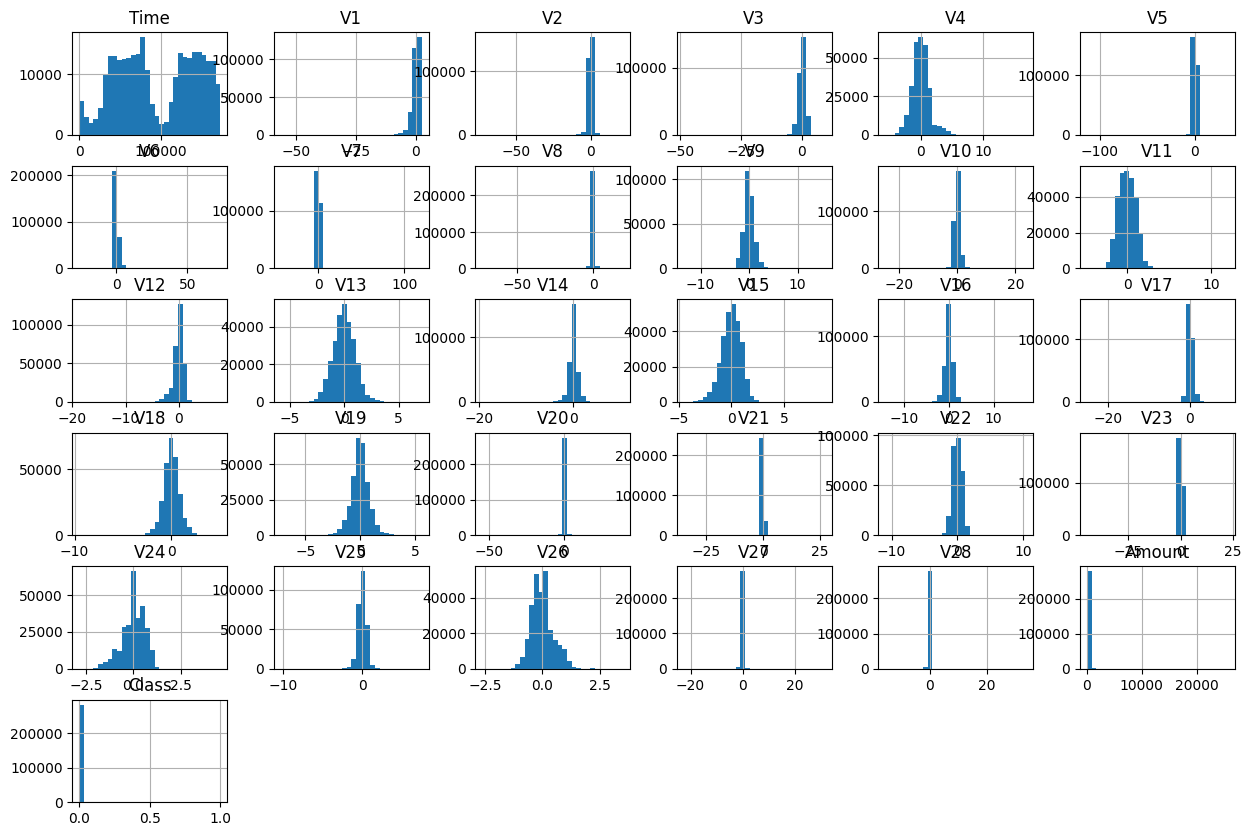

In [110]:
# Histograms for all numeric columns
plot.histogram(df_cleaned)

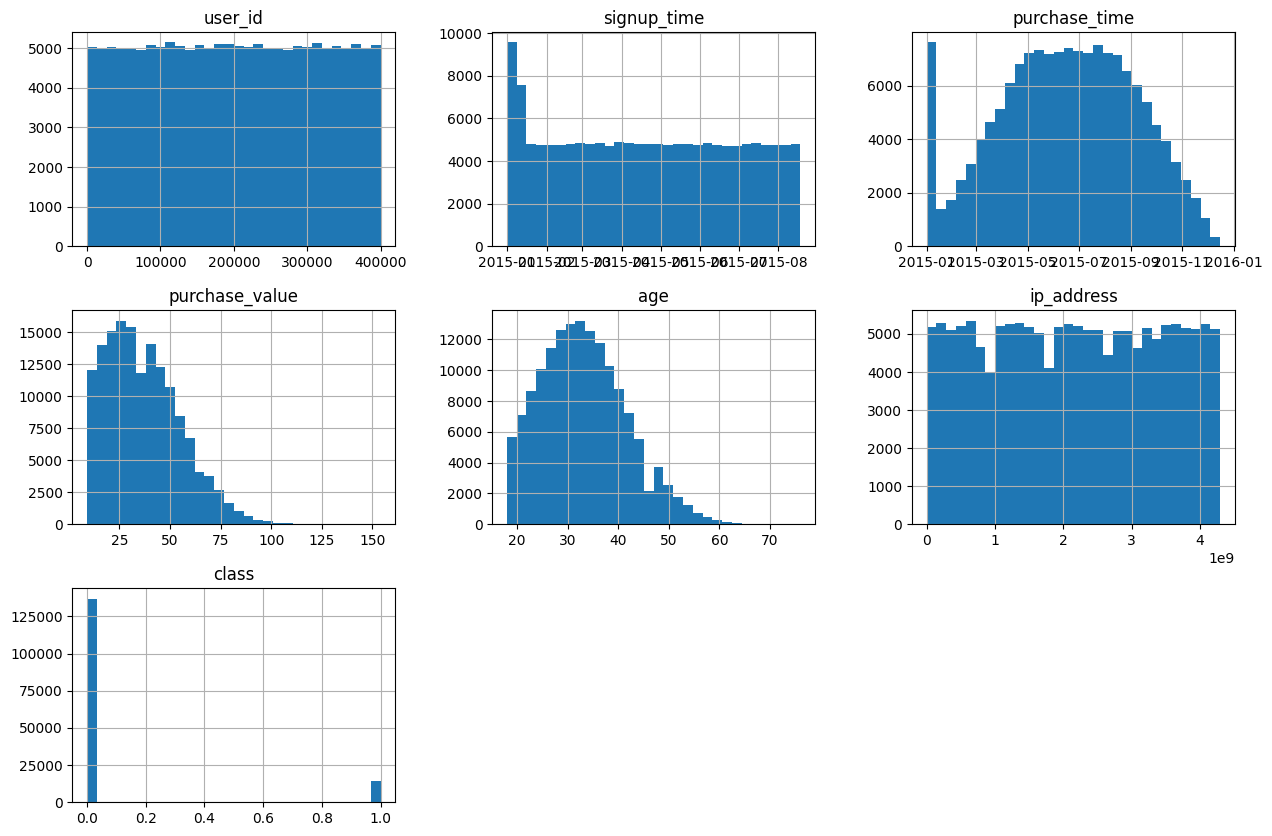

In [121]:
plot.histogram(merged_df)

### Boxplots to Detect Outliers

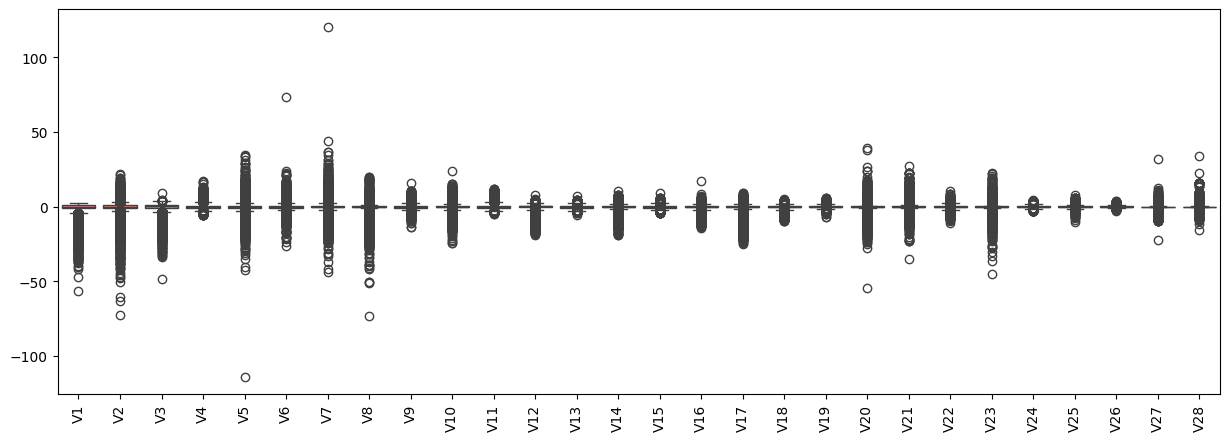

In [111]:
plot.boxplot(df_cleaned)

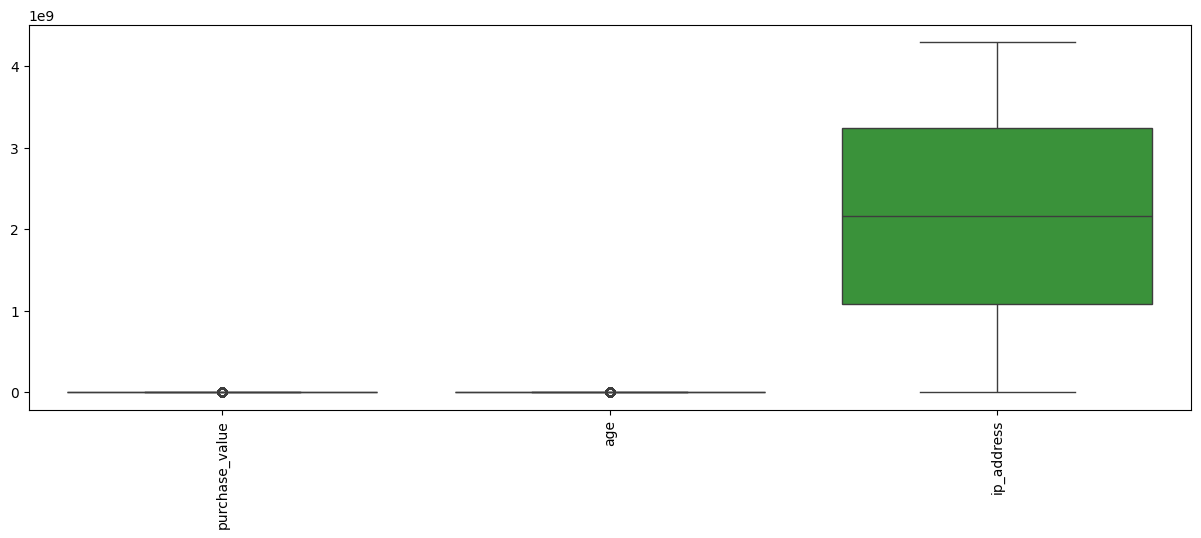

In [122]:
plot.boxplot(merged_df)

### Target Variable Analysis (Class)

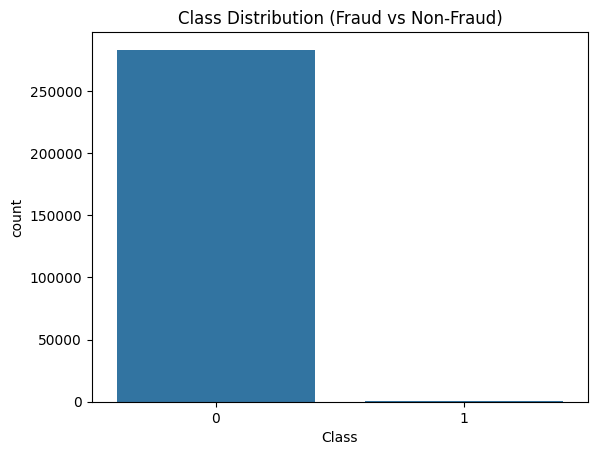

In [113]:
plot.target_variable_analysis(df_cleaned)

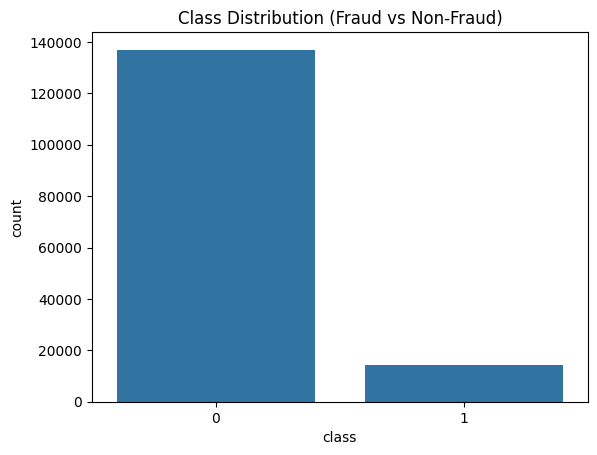

In [124]:
plot.target_variable_merge(merged_df)

## Bivariate Analysis (Relationships Between Variables)

### Pairplot for Some Variables

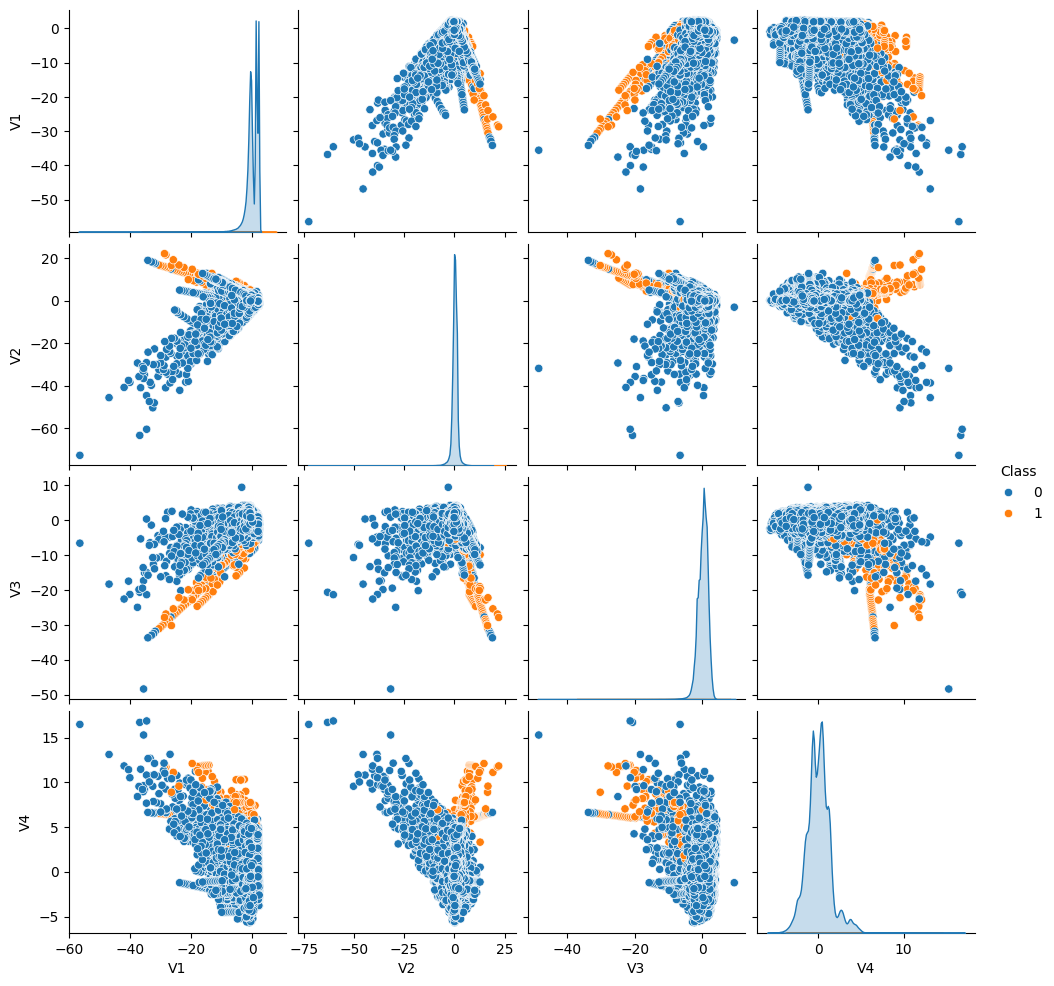

In [114]:
plot.pair_plot_analysis(df_cleaned)

### Boxplots for Amount vs Class

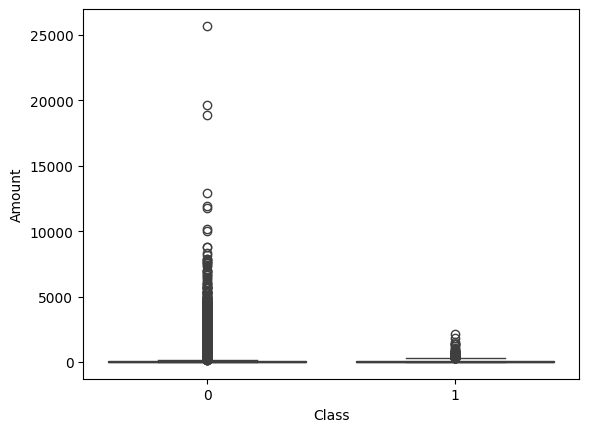

In [125]:
plot.Boxplots_for_Amount_vs_Class(df_cleaned)

### Outlier Detection

In [12]:
plot.Outlier_Detection(df_cleaned)

V6     4031
V20    3072
V4     2860
V10    2783
V21    2446
V19    2229
V17    2073
V9     1977
V23    1901
V27    1806
V7     1453
V2     1445
V5     1389
V28    1026
V26     992
V8      978
V13     780
V25     759
V14     747
V11     565
V18     563
V22     337
V16     316
V15     203
V12     177
V24     125
V3        1
V1        0
dtype: int64


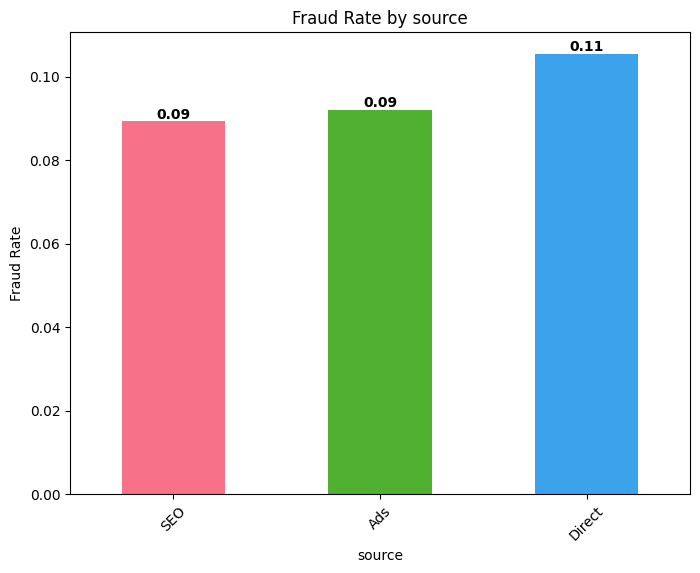

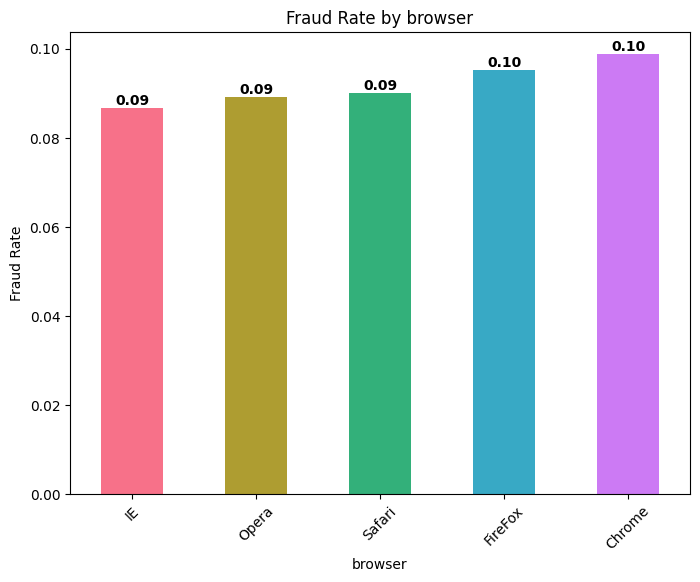

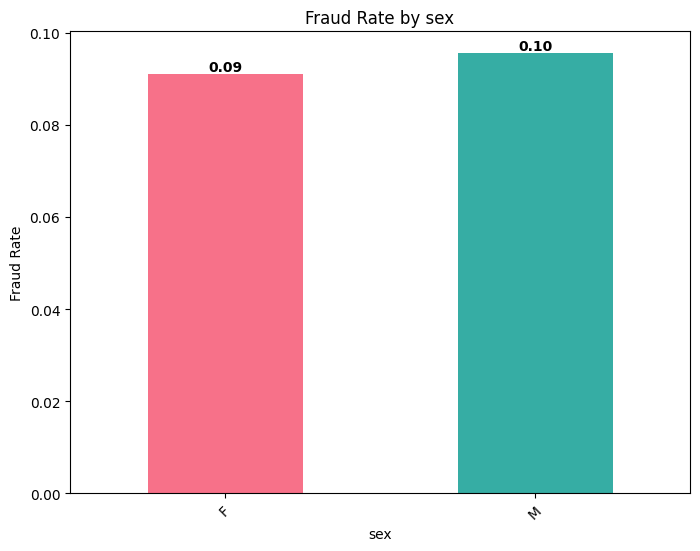

In [138]:
plot.Fraud_Rates_by_Categorical_Features(merged_df)

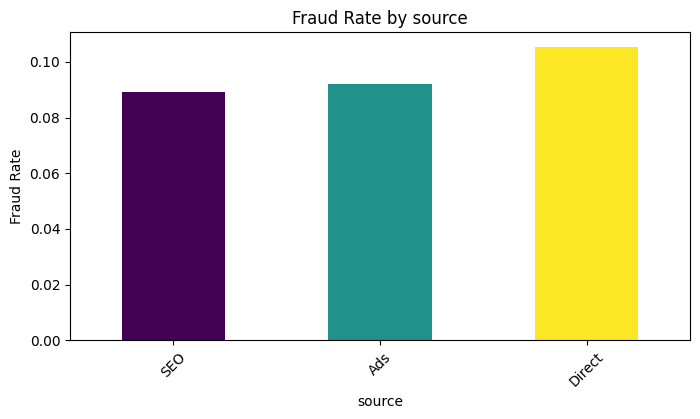

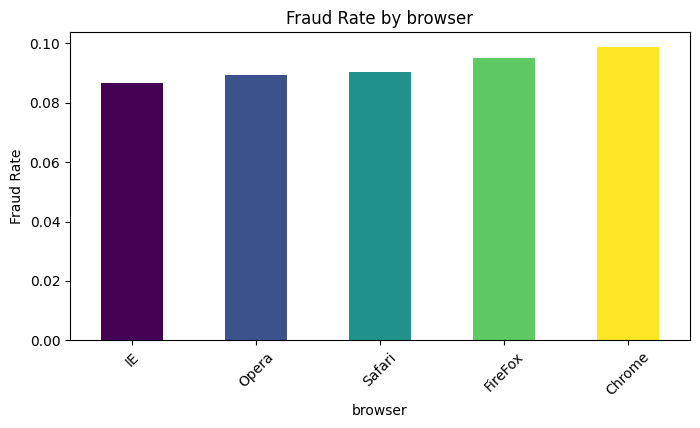

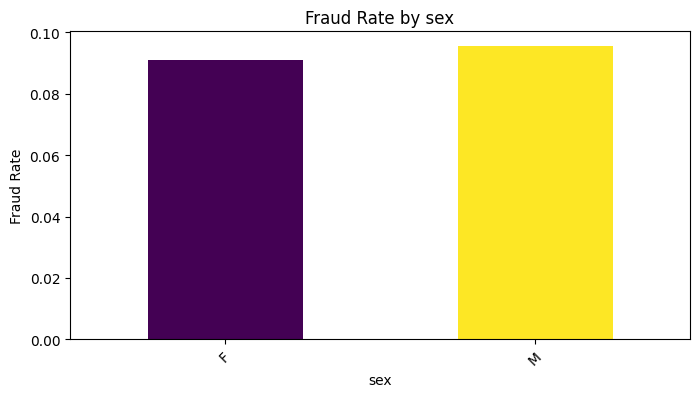

In [135]:
plot.Fraud_Rates_by_Categorical_Features1(merged_df)

In [81]:
merged_df.select_dtypes(include=['number']).columns

Index(['user_id', 'purchase_value', 'age', 'ip_address', 'class'], dtype='object')

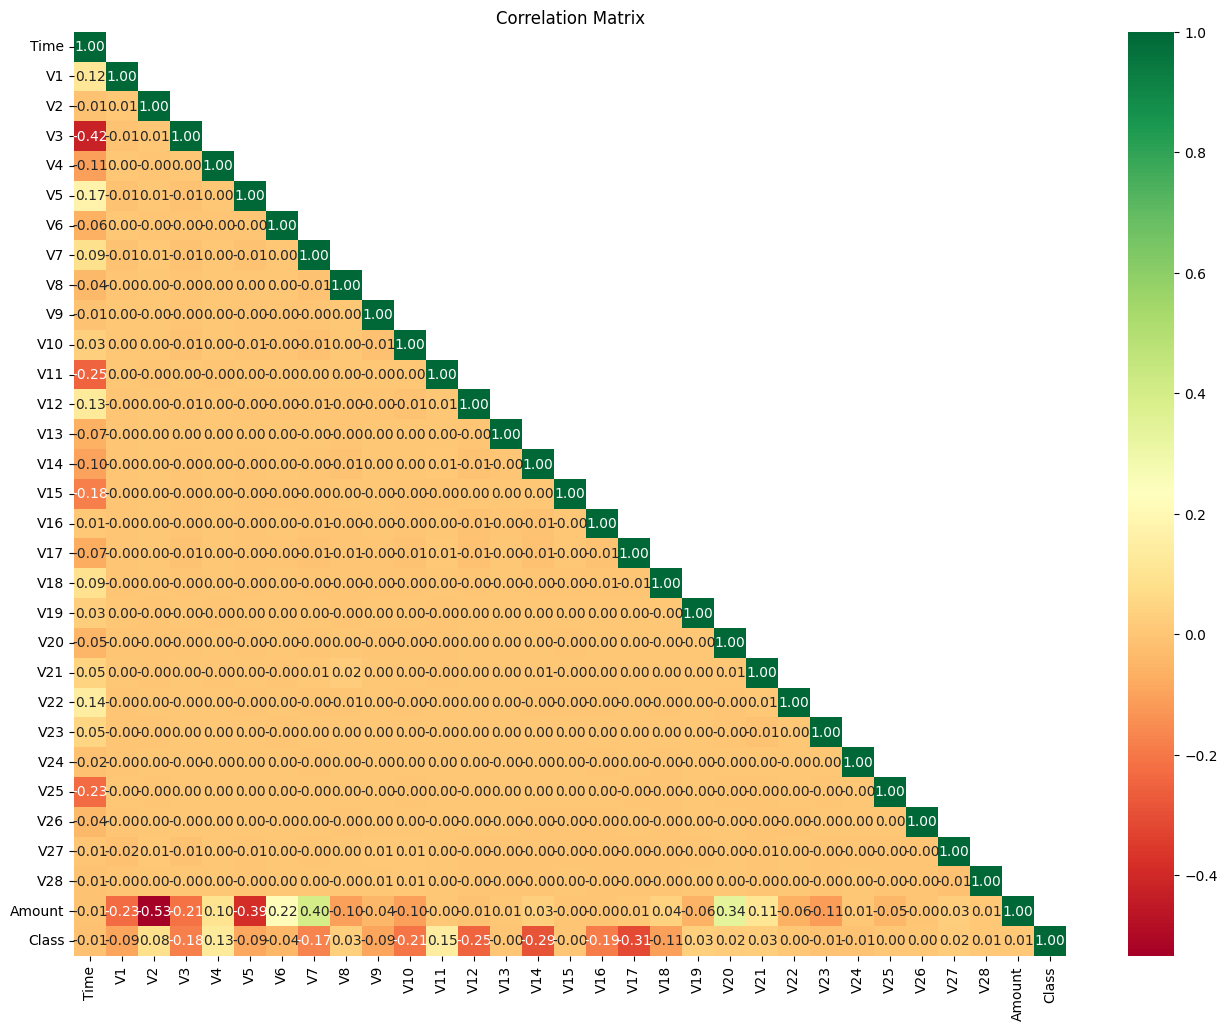

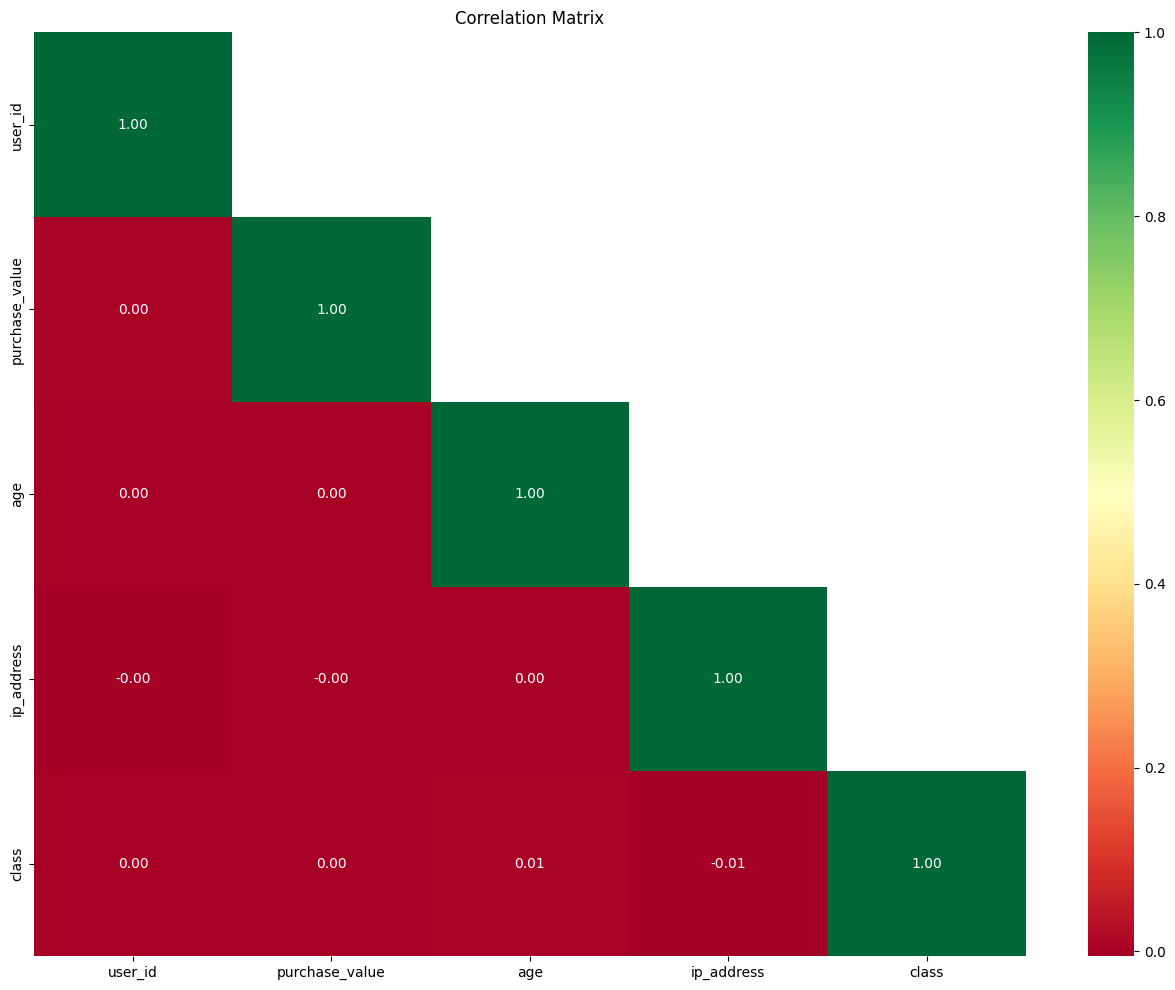

In [82]:
plot.eda()

In [118]:
merged_df.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country
0,62421,2015-02-16 00:17:05,2015-03-08 10:00:39,46,ZCLZTAJPCRAQX,Direct,Safari,M,36,52093.496895,0,NaN
1,173212,2015-03-08 04:03:22,2015-03-20 17:23:45,33,YFGYOALADBHLT,Ads,IE,F,30,93447.138961,0,NaN
2,242286,2015-05-17 16:45:54,2015-05-26 08:54:34,33,QZNVQTUITFTHH,Direct,FireFox,F,32,105818.501505,0,NaN
3,370003,2015-03-03 19:58:39,2015-05-28 21:09:13,33,PIBUQMBIELMMG,Ads,IE,M,40,117566.664867,0,NaN
4,119824,2015-03-20 00:31:27,2015-04-05 07:31:46,55,WFIIFCPIOGMHT,Ads,Safari,M,38,131423.789042,0,NaN


### Data Balancing (Optional, If Class Is Imbalanced)

In [139]:
print(df_cleaned['Class'].value_counts())  # Check class distribution

# If highly imbalanced, consider resampling
from imblearn.over_sampling import SMOTE

X = df_cleaned.drop(columns=['Class'])
y = df_cleaned['Class']

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


Class
0    283253
1       473
Name: count, dtype: int64


In [142]:
y_resampled.shape

(566506,)

### Feature Engineering

In [26]:
merged_df.columns, df_cleaned.columns

(Index(['user_id', 'signup_time', 'purchase_time', 'purchase_value',
        'device_id', 'source', 'browser', 'sex', 'age', 'ip_address', 'class',
        'country'],
       dtype='object'),
 Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
        'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
        'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
        'Class'],
       dtype='object'))

In [95]:
df_cleaned.head(1)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0


In [11]:
eng_df = preprocessor.feature_engineering(merged_df)

Feature engineering completed.


In [28]:
eng_df.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country,transaction_count,hour_of_day,day_of_week
634,247547,2015-06-28 03:00:34,2015-08-09 03:57:29,47,KIXYSVCHIPQBR,SEO,Safari,F,30,1.677886e+07,0,Australia,1,3,6
635,220737,2015-01-28 14:21:11,2015-02-11 20:28:28,15,PKYOWQKWGJNJI,SEO,Chrome,F,34,1.684205e+07,0,Thailand,1,20,2
636,390400,2015-03-19 20:49:09,2015-04-11 23:41:23,44,LVCSXLISZHVUO,Ads,IE,M,29,1.684366e+07,0,China,1,23,5
637,69592,2015-02-24 06:11:57,2015-05-23 16:40:14,55,UHAUHNXXUADJE,Direct,Chrome,F,30,1.693873e+07,0,China,1,16,5
638,174987,2015-07-07 12:58:11,2015-11-03 04:04:30,51,XPGPMOHIDRMGE,SEO,Chrome,F,37,1.697198e+07,0,Thailand,1,4,1


In [86]:
eng_df.isna().sum()

user_id              0
signup_time          0
purchase_time        0
purchase_value       0
device_id            0
source               0
browser              0
sex                  0
age                  0
ip_address           0
class                0
country              0
transaction_count    0
hour_of_day          0
day_of_week          0
dtype: int64

### Normalization

In [12]:
normalized_df = preprocessor.normalize_and_scale(df_cleaned)

Normalization applied.


In [30]:
normalized_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.005824,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0.000105,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0.014739,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.004807,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.002724,0


### Converting Categorical data

In [13]:
encoded = preprocessor.encode_categorical_features(eng_df)

Categorical features encoded.


In [14]:
encoded = encoded.drop(columns = ['device_id'])

In [75]:
encoded.head(2)

,user_id,signup_time,purchase_time,purchase_value,source,browser,sex,age,ip_address,class,country,transaction_count,hour_of_day,day_of_week
634,247547,2015-06-28 03:00:34,2015-08-09 03:57:29,47,2,4,0,30,1.677886e+07,0,7,1,3,6
635,220737,2015-01-28 14:21:11,2015-02-11 20:28:28,15,2,0,0,34,1.684205e+07,0,162,1,20,2


In [34]:
df_cleaned.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.005824,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0.000105,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0.014739,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.004807,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.002724,0


In [26]:
encoded.columns

Index(['user_id', 'signup_time', 'purchase_time', 'purchase_value', 'source',
       'browser', 'sex', 'age', 'ip_address', 'class', 'country',
       'transaction_count', 'hour_of_day', 'day_of_week',
       'signup_to_purchase_seconds'],
      dtype='object')

### Instaniation 

### Prepare the data for model building

### Data Preparation for Credit Card Data

### Data Preparation for Fruad Data

### Model Building

In [15]:
# Initialize trainer
trainer1 = ModelTrainer1(normalized_df, encoded)

In [16]:
# Run all experiments
trainer1.run_experiments()


Training models for Credit Card dataset...
Logistic Regression Accuracy: 0.9992
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.89      0.56      0.68        90

    accuracy                           1.00     56746
   macro avg       0.95      0.78      0.84     56746
weighted avg       1.00      1.00      1.00     56746



2025/02/10 20:31:45 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Model Credit Card_Logistic Regression saved as Logistic Regression.pkl
Decision Tree Accuracy: 0.9990
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.67      0.71      0.69        90

    accuracy                           1.00     56746
   macro avg       0.84      0.86      0.85     56746
weighted avg       1.00      1.00      1.00     56746



2025/02/10 20:32:30 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Model Credit Card_Decision Tree saved as Decision Tree.pkl
Random Forest Accuracy: 0.9995
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.97      0.73      0.84        90

    accuracy                           1.00     56746
   macro avg       0.99      0.87      0.92     56746
weighted avg       1.00      1.00      1.00     56746



2025/02/10 20:38:15 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Model Credit Card_Random Forest saved as Random Forest.pkl
Gradient Boosting Accuracy: 0.9993
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.90      0.63      0.75        90

    accuracy                           1.00     56746
   macro avg       0.95      0.82      0.87     56746
weighted avg       1.00      1.00      1.00     56746



2025/02/10 20:47:51 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Model Credit Card_Gradient Boosting saved as Gradient Boosting.pkl
MLP Accuracy: 0.9995
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.93      0.77      0.84        90

    accuracy                           1.00     56746
   macro avg       0.97      0.88      0.92     56746
weighted avg       1.00      1.00      1.00     56746



2025/02/10 20:48:34 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Model Credit Card_MLP saved as MLP.pkl


c:\Users\Admin\.pyenv\pyenv-win\versions\3.10.11\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\Admin\.pyenv\pyenv-win\versions\3.10.11\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Training CNN model...
X_train shape: (226980, 30, 1), y_train shape: (226980, 1)
X_test shape: (56746, 30, 1), y_test shape: (56746, 1)
Epoch 1/10
5675/5675 ━━━━━━━━━━━━━━━━━━━━ 53s 8ms/step - accuracy: 0.9970 - loss: 0.0197 - val_accuracy: 0.9987 - val_loss: 0.0053
Epoch 2/10
5675/5675 ━━━━━━━━━━━━━━━━━━━━ 40s 7ms/step - accuracy: 0.9992 - loss: 0.0043 - val_accuracy: 0.9992 - val_loss: 0.0043
Epoch 3/10
5675/5675 ━━━━━━━━━━━━━━━━━━━━ 46s 8ms/step - accuracy: 0.9993 - loss: 0.0040 - val_accuracy: 0.9992 - val_loss: 0.0050
Epoch 4/10
5675/5675 ━━━━━━━━━━━━━━━━━━━━ 46s 8ms/step - accuracy: 0.9995 - loss: 0.0034 - val_accuracy: 0.9992 - val_loss: 0.0044
Epoch 5/10
5675/5675 ━━━━━━━━━━━━━━━━━━━━ 40s 7ms/step - accuracy: 0.9993 - loss: 0.0038 - val_accuracy: 0.9985 - val_loss: 0.0077
Epoch 6/10
5675/5675 ━━━━━━━━━━━━━━━━━━━━ 44s 8ms/step - accuracy: 0.9992 - loss: 0.0038 - val_accuracy: 0.9993 - val_loss: 0.0040
Epoch 7/10
5675/5675 ━━━━━━━━━━━━━━━━━━━━ 41s 7ms/step - accuracy: 0.9995 - l

2025/02/10 20:56:38 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


CNN Accuracy: 0.9994
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.97      0.62      0.76        90

    accuracy                           1.00     56746
   macro avg       0.98      0.81      0.88     56746
weighted avg       1.00      1.00      1.00     56746



2025/02/10 20:57:07 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Model CNN saved as CNN.h5

Training RNN model...
X_train shape: (226980, 30, 1), y_train shape: (226980, 1)
X_test shape: (56746, 30, 1), y_test shape: (56746, 1)
Epoch 1/10
5675/5675 ━━━━━━━━━━━━━━━━━━━━ 75s 13ms/step - accuracy: 0.9967 - loss: 0.0215 - val_accuracy: 0.9981 - val_loss: 0.1734
Epoch 2/10
5675/5675 ━━━━━━━━━━━━━━━━━━━━ 68s 10ms/step - accuracy: 0.9986 - loss: 0.0088 - val_accuracy: 0.9991 - val_loss: 0.0055
Epoch 3/10
5675/5675 ━━━━━━━━━━━━━━━━━━━━ 53s 9ms/step - accuracy: 0.9990 - loss: 0.0102 - val_accuracy: 0.9991 - val_loss: 0.0050
Epoch 4/10
5675/5675 ━━━━━━━━━━━━━━━━━━━━ 49s 9ms/step - accuracy: 0.9991 - loss: 0.0050 - val_accuracy: 0.9989 - val_loss: 0.0054
Epoch 5/10
5675/5675 ━━━━━━━━━━━━━━━━━━━━ 50s 9ms/step - accuracy: 0.9991 - loss: 0.0059 - val_accuracy: 0.9981 - val_loss: 0.0111
Epoch 6/10
5675/5675 ━━━━━━━━━━━━━━━━━━━━ 52s 9ms/step - accuracy: 0.9984 - loss: 0.0084 - val_accuracy: 0.9984 - val_loss: 0.0060
Epoch 7/10
5675/5675 ━━━━━━━━━━━━━━━━━━━━ 60s 11m

2025/02/10 21:07:54 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


RNN Accuracy: 0.9993
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.86      0.67      0.75        90

    accuracy                           1.00     56746
   macro avg       0.93      0.83      0.87     56746
weighted avg       1.00      1.00      1.00     56746



2025/02/10 21:08:08 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Model RNN saved as RNN.h5

Training LSTM model...
X_train shape: (226980, 30, 1), y_train shape: (226980, 1)
X_test shape: (56746, 30, 1), y_test shape: (56746, 1)
Epoch 1/10
5675/5675 ━━━━━━━━━━━━━━━━━━━━ 206s 35ms/step - accuracy: 0.9979 - loss: 0.0213 - val_accuracy: 0.9991 - val_loss: 0.0052
Epoch 2/10
5675/5675 ━━━━━━━━━━━━━━━━━━━━ 175s 31ms/step - accuracy: 0.9992 - loss: 0.0043 - val_accuracy: 0.9985 - val_loss: 0.0075
Epoch 3/10
5675/5675 ━━━━━━━━━━━━━━━━━━━━ 161s 28ms/step - accuracy: 0.9994 - loss: 0.0037 - val_accuracy: 0.9989 - val_loss: 0.0052
Epoch 4/10
5675/5675 ━━━━━━━━━━━━━━━━━━━━ 155s 27ms/step - accuracy: 0.9994 - loss: 0.0036 - val_accuracy: 0.9992 - val_loss: 0.0037
Epoch 5/10
5675/5675 ━━━━━━━━━━━━━━━━━━━━ 146s 26ms/step - accuracy: 0.9993 - loss: 0.0040 - val_accuracy: 0.9992 - val_loss: 0.0041
Epoch 6/10
5675/5675 ━━━━━━━━━━━━━━━━━━━━ 146s 26ms/step - accuracy: 0.9993 - loss: 0.0038 - val_accuracy: 0.9993 - val_loss: 0.0043
Epoch 7/10
5675/5675 ━━━━━━━━━━━━━━━━━

2025/02/10 21:35:43 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


LSTM Accuracy: 0.9994
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.91      0.71      0.80        90

    accuracy                           1.00     56746
   macro avg       0.96      0.86      0.90     56746
weighted avg       1.00      1.00      1.00     56746



2025/02/10 21:35:54 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Model LSTM saved as LSTM.h5

Training models for Fraud Data dataset...
Logistic Regression Accuracy: 0.9068


c:\Users\Admin\.pyenv\pyenv-win\versions\3.10.11\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\.pyenv\pyenv-win\versions\3.10.11\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\.pyenv\pyenv-win\versions\3.10.11\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     27291
           1       0.00      0.00      0.00      2805

    accuracy                           0.91     30096
   macro avg       0.45      0.50      0.48     30096
weighted avg       0.82      0.91      0.86     30096



2025/02/10 21:36:00 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Model Fraud Data_Logistic Regression saved as Logistic Regression.pkl
Decision Tree Accuracy: 0.9022
              precision    recall  f1-score   support

           0       0.95      0.94      0.95     27291
           1       0.48      0.56      0.52      2805

    accuracy                           0.90     30096
   macro avg       0.72      0.75      0.73     30096
weighted avg       0.91      0.90      0.91     30096



2025/02/10 21:36:09 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Model Fraud Data_Decision Tree saved as Decision Tree.pkl
Random Forest Accuracy: 0.9561
              precision    recall  f1-score   support

           0       0.95      1.00      0.98     27291
           1       1.00      0.53      0.69      2805

    accuracy                           0.96     30096
   macro avg       0.98      0.76      0.83     30096
weighted avg       0.96      0.96      0.95     30096



2025/02/10 21:36:55 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Model Fraud Data_Random Forest saved as Random Forest.pkl
Gradient Boosting Accuracy: 0.9560
              precision    recall  f1-score   support

           0       0.95      1.00      0.98     27291
           1       1.00      0.53      0.69      2805

    accuracy                           0.96     30096
   macro avg       0.98      0.76      0.83     30096
weighted avg       0.96      0.96      0.95     30096



2025/02/10 21:37:40 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Model Fraud Data_Gradient Boosting saved as Gradient Boosting.pkl
MLP Accuracy: 0.9523
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     27291
           1       0.93      0.53      0.67      2805

    accuracy                           0.95     30096
   macro avg       0.94      0.76      0.82     30096
weighted avg       0.95      0.95      0.95     30096



2025/02/10 21:38:45 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
c:\Users\Admin\.pyenv\pyenv-win\versions\3.10.11\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\Admin\.pyenv\pyenv-win\versions\3.10.11\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model Fraud Data_MLP saved as MLP.pkl

Training CNN model...
X_train shape: (120382, 12, 1), y_train shape: (120382, 1)
X_test shape: (30096, 12, 1), y_test shape: (30096, 1)
Epoch 1/10
3010/3010 ━━━━━━━━━━━━━━━━━━━━ 18s 5ms/step - accuracy: 0.9060 - loss: 0.3019 - val_accuracy: 0.9085 - val_loss: 0.2526
Epoch 2/10
3010/3010 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - accuracy: 0.9211 - loss: 0.2463 - val_accuracy: 0.9073 - val_loss: 0.2628
Epoch 3/10
3010/3010 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.9378 - loss: 0.2193 - val_accuracy: 0.9429 - val_loss: 0.2101
Epoch 4/10
3010/3010 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - accuracy: 0.9433 - loss: 0.2070 - val_accuracy: 0.9428 - val_loss: 0.2092
Epoch 5/10
3010/3010 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - accuracy: 0.9450 - loss: 0.2049 - val_accuracy: 0.9451 - val_loss: 0.2070
Epoch 6/10
3010/3010 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.9463 - loss: 0.2007 - val_accuracy: 0.9482 - val_loss: 0.1993
Epoch 7/10
3010/3010 ━━━━━━━━━━━━━━━━━━

2025/02/10 21:41:54 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


CNN Accuracy: 0.9478
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     27291
           1       0.90      0.50      0.64      2805

    accuracy                           0.95     30096
   macro avg       0.92      0.75      0.81     30096
weighted avg       0.95      0.95      0.94     30096



2025/02/10 21:42:04 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Model CNN saved as CNN.h5

Training RNN model...
X_train shape: (120382, 12, 1), y_train shape: (120382, 1)
X_test shape: (30096, 12, 1), y_test shape: (30096, 1)
Epoch 1/10
3010/3010 ━━━━━━━━━━━━━━━━━━━━ 16s 5ms/step - accuracy: 0.9083 - loss: 0.2743 - val_accuracy: 0.9315 - val_loss: 0.2251
Epoch 2/10
3010/3010 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - accuracy: 0.9333 - loss: 0.2218 - val_accuracy: 0.9372 - val_loss: 0.2162
Epoch 3/10
3010/3010 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 0.9393 - loss: 0.2133 - val_accuracy: 0.9424 - val_loss: 0.2059
Epoch 4/10
3010/3010 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 0.9425 - loss: 0.2075 - val_accuracy: 0.9463 - val_loss: 0.2016
Epoch 5/10
3010/3010 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 0.9439 - loss: 0.2051 - val_accuracy: 0.9504 - val_loss: 0.2016
Epoch 6/10
3010/3010 ━━━━━━━━━━━━━━━━━━━━ 15s 5ms/step - accuracy: 0.9455 - loss: 0.2032 - val_accuracy: 0.9395 - val_loss: 0.2061
Epoch 7/10
3010/3010 ━━━━━━━━━━━━━━━━━━━━ 15s 5ms/s

2025/02/10 21:44:50 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


RNN Accuracy: 0.9479
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     27291
           1       0.85      0.53      0.66      2805

    accuracy                           0.95     30096
   macro avg       0.90      0.76      0.81     30096
weighted avg       0.94      0.95      0.94     30096



2025/02/10 21:45:01 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Model RNN saved as RNN.h5

Training LSTM model...
X_train shape: (120382, 12, 1), y_train shape: (120382, 1)
X_test shape: (30096, 12, 1), y_test shape: (30096, 1)
Epoch 1/10
3010/3010 ━━━━━━━━━━━━━━━━━━━━ 43s 13ms/step - accuracy: 0.9150 - loss: 0.2776 - val_accuracy: 0.9253 - val_loss: 0.2355
Epoch 2/10
3010/3010 ━━━━━━━━━━━━━━━━━━━━ 41s 13ms/step - accuracy: 0.9404 - loss: 0.2114 - val_accuracy: 0.9468 - val_loss: 0.2052
Epoch 3/10
3010/3010 ━━━━━━━━━━━━━━━━━━━━ 41s 13ms/step - accuracy: 0.9429 - loss: 0.2070 - val_accuracy: 0.9471 - val_loss: 0.2011
Epoch 4/10
3010/3010 ━━━━━━━━━━━━━━━━━━━━ 41s 13ms/step - accuracy: 0.9449 - loss: 0.2047 - val_accuracy: 0.9442 - val_loss: 0.2053
Epoch 5/10
3010/3010 ━━━━━━━━━━━━━━━━━━━━ 39s 13ms/step - accuracy: 0.9470 - loss: 0.2003 - val_accuracy: 0.9458 - val_loss: 0.2014
Epoch 6/10
3010/3010 ━━━━━━━━━━━━━━━━━━━━ 40s 13ms/step - accuracy: 0.9464 - loss: 0.2021 - val_accuracy: 0.9475 - val_loss: 0.2001
Epoch 7/10
3010/3010 ━━━━━━━━━━━━━━━━━━━━ 40

2025/02/10 21:51:52 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


LSTM Accuracy: 0.9486
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     27291
           1       0.86      0.53      0.66      2805

    accuracy                           0.95     30096
   macro avg       0.91      0.76      0.82     30096
weighted avg       0.95      0.95      0.94     30096



2025/02/10 21:52:03 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Model LSTM saved as LSTM.h5


## Task 3 - Model Explainability

In [16]:
X_train, X_test, y_train, y_test,X = trainer1.train_test_split1()

In [20]:
X_test.columns

Index(['user_id', 'purchase_value', 'source', 'browser', 'sex', 'age',
       'ip_address', 'country', 'transaction_count', 'hour_of_day',
       'day_of_week', 'signup_to_purchase_seconds'],
      dtype='object')

In [17]:
# Path to your saved model
model_path = '../Notebooks/Fraud Data_Random Forest.pkl'

In [18]:
# Initialize the explainability class
explainability = ModelExplainability(model_path, X_train, y_train, X_test)

In [ ]:
# SHAP Plots:
explainability.shap_summary_plot()  # Summary Plot

In [ ]:
explainability.shap_force_plot(instance_index=0)  # Force Plot for the first instance

In [ ]:
explainability.shap_dependence_plot('transaction_count')  # Dependence plot for the feature 'transaction_count'

X_train and y_train types are not compatible.
Shape of X_train: (120382, 12)
Shape of y_train: (120382, 1)
Instance selected: user_id                      -1.079749
purchase_value                1.749790
source                       -1.125427
browser                      -0.954166
sex                          -1.185551
age                          -1.176598
ip_address                    0.321046
country                       0.966078
transaction_count             0.000000
hour_of_day                   0.937139
day_of_week                  -0.006238
signup_to_purchase_seconds    0.000000
Name: 0, dtype: float64


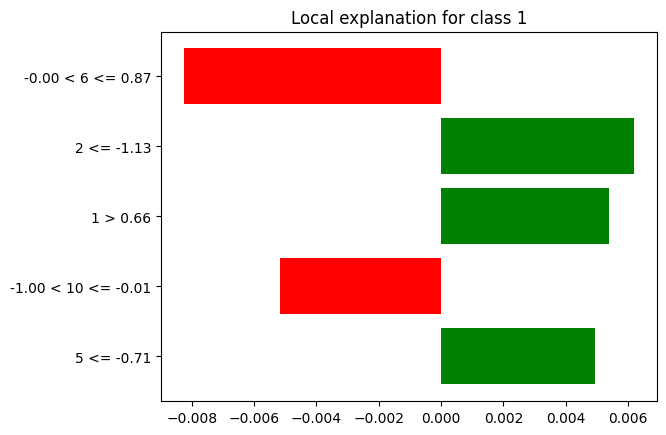

In [99]:
# LIME Explanation:
explainability.lime_explanation(instance_index=0)  # Explanation for the first instance

X_train and y_train types are not compatible.
Shape of X_train: (120382, 12)
Shape of y_train: (120382, 1)
Instance selected: user_id                      -1.079749
purchase_value                1.749790
source                       -1.125427
browser                      -0.954166
sex                          -1.185551
age                          -1.176598
ip_address                    0.321046
country                       0.966078
transaction_count             0.000000
hour_of_day                   0.937139
day_of_week                  -0.006238
signup_to_purchase_seconds    1.544017
Name: 0, dtype: float64


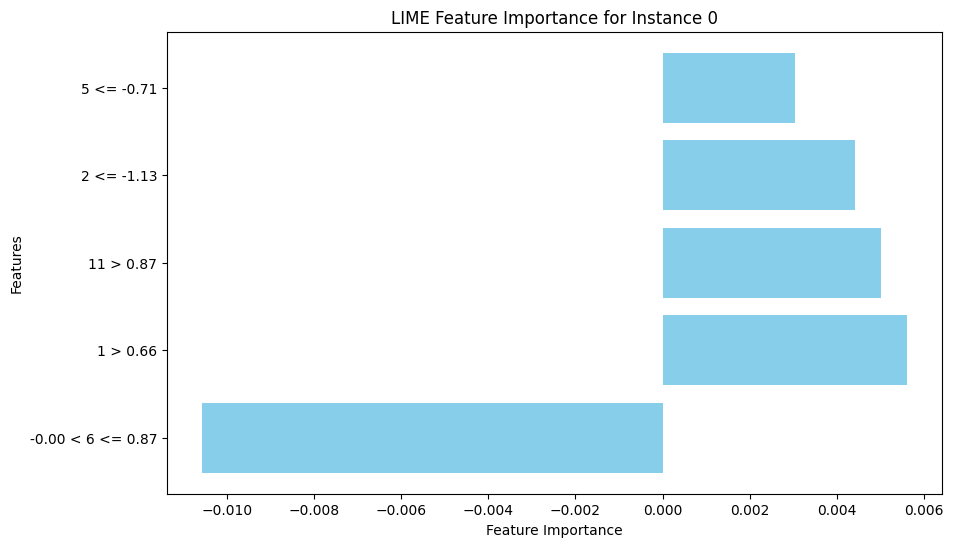

In [23]:
# LIME Explanation:
explainability.lime_explanation1(instance_index=0)  # Explanation for the first instance

X_train and y_train types are not compatible.
Shape of X_train: (120382, 12)
Shape of y_train: (120382, 1)
Instance selected: user_id                       1.349520
purchase_value                0.276369
source                       -0.005544
browser                      -0.954166
sex                           0.843490
age                           0.332061
ip_address                   -1.233486
country                      -0.383463
transaction_count             0.000000
hour_of_day                   1.515749
day_of_week                  -0.006238
signup_to_purchase_seconds   -0.055219
Name: 1, dtype: float64


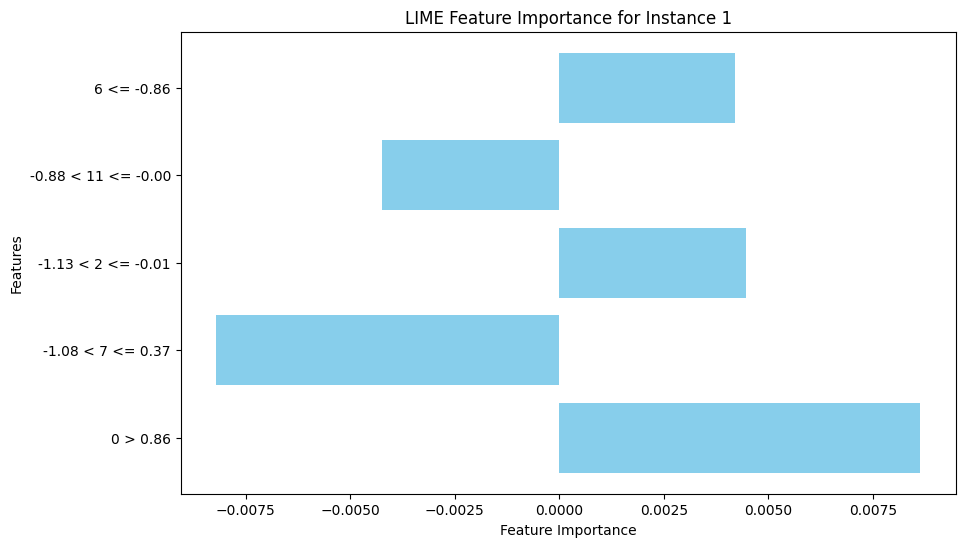

In [24]:
# LIME Explanation:
explainability.lime_explanation1(instance_index=1) 

In [24]:
encoded.columns

Index(['user_id', 'signup_time', 'purchase_time', 'purchase_value', 'source',
       'browser', 'sex', 'age', 'ip_address', 'class', 'country',
       'transaction_count', 'hour_of_day', 'day_of_week',
       'signup_to_purchase_seconds'],
      dtype='object')